In [1]:
import os, sys, math, glob
import json, csv, re, datetime
import pickle
import collections
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import cm as cm
from tqdm import tqdm
from collections import Counter

from util_read import read_vids

import my_util

In [2]:
engage_dataset_base = "G:/MLCV dataset/engagement'16/tweeted_videos"

categories_eligible = ["autos", "comedy","education","entertainment", \
                       "film","gaming","howto","music",\
                       "news","people","science","sports",\
                       "travel"]

file_vids_filter_all = "C:/Users/u6314203/pyProjects/hip-popularity/data/engage16/filtered/vids_filter_all.csv"

In [3]:
def engage_read_combine(engage_dataset_base, category, eval_days = [90, 135, 180, 225, 270]):
    vids = []
    days = []
    views = []
    
    with open(os.path.join(engage_dataset_base, "{}.json".format(category)), "r") as f:
        dataset_json = f.readlines()
    dataset = {}
    
    vids_set = set()
    for line in dataset_json:
        record = json.loads(line)
        try:        
            day = [int(x) for x in record['insights']['days'].split(",")]                        
            if len(day) < eval_days[-1]: # filter out videos of short history
                continue                
            vals = {
                "day_zero": record['insights']['startDate'], 
                "days": day, 
                "viewCounts": [int(x) for x in record['insights']['dailyView'].split(",")],
                "shares": [int(x) for x in record['insights']['dailyShare'].split(",")],
            }
        except:
            continue
        dataset[record['id']] = vals
        
        if record['id'] in vids_set: 
            continue
        else: 
            vids_set.add(record['id'])
    
        vids.append(record['id'])
        days.append(day)
        views.append(vals["viewCounts"])
        
    print("Engage {} size: {}".format(category, len(dataset.keys())))
    return (vids, days, views)

In [4]:
# vids from all category
vids_filter_all = read_vids(file_vids_filter_all)

Vids(filtered) in each category:
autos:25712; comedy:31741; education:41191; entertainment:180128; film:43101; gaming:222236; howto:61027; music:118094; news:38249; people:222658; science:32278; sports:39649; travel:13112


In [6]:
categories = ["news", "music"]

Engage news size: 37508


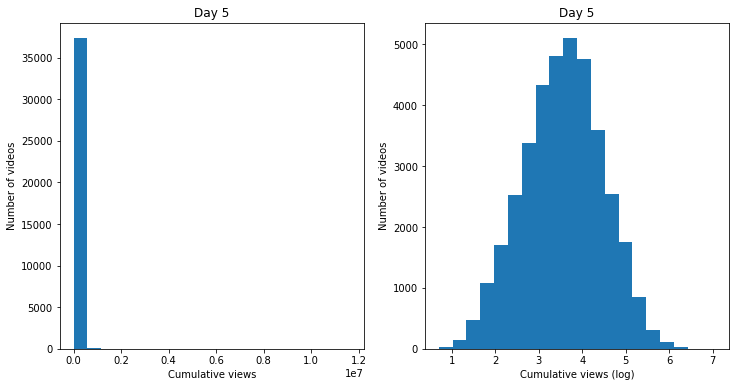

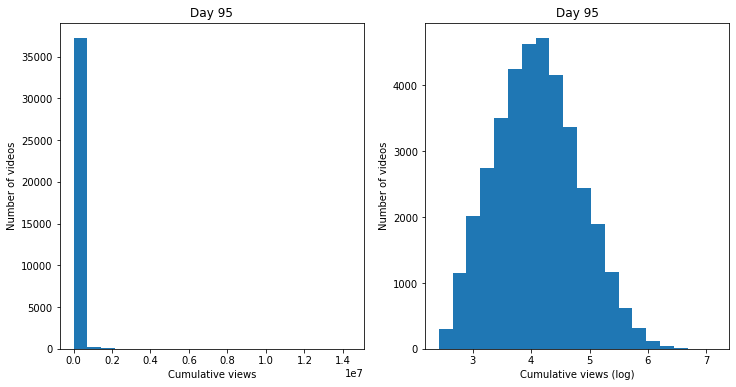

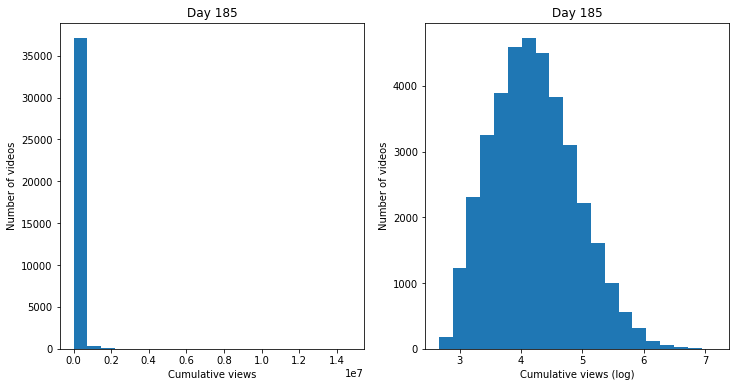

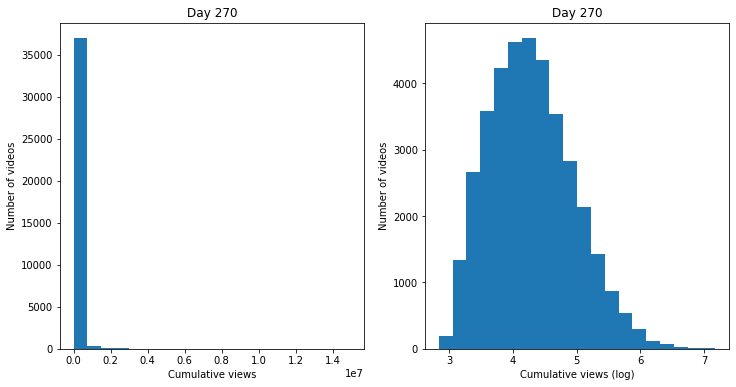

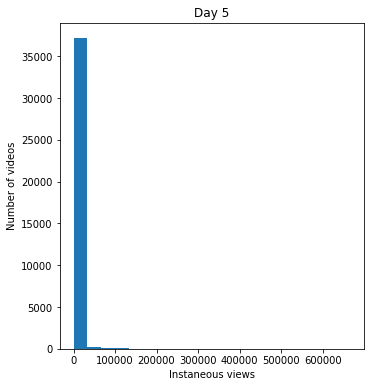

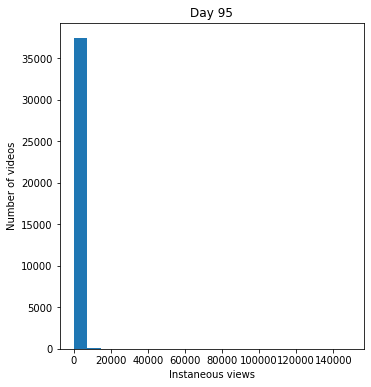

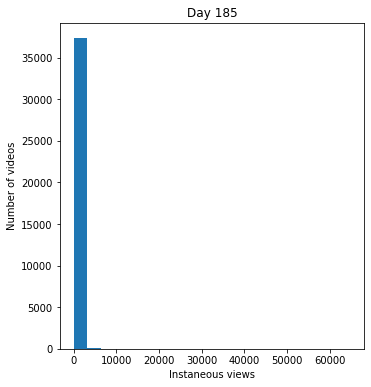

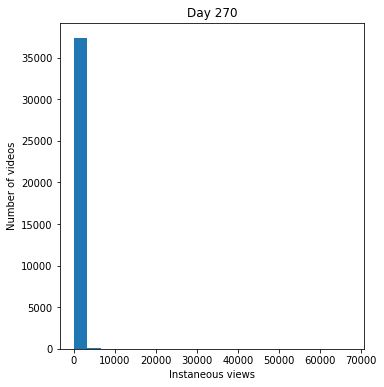

In [12]:
category = categories[0]
vids, days, views = engage_read_combine(engage_dataset_base, category)
eval_days = [5, 95, 185, 270]

# cumulative
df_total_views = my_util.total_at(eval_days, views, vids, accumulate=True)
for day in eval_days[:]:
    fig = plt.figure(figsize=(12, 6))

    series1 = df_total_views[day]
    ax = fig.add_subplot(1,2,1)
    n, bins, patches = ax.hist(series1+10e-6, bins=20)
    ax.set_title(f"Day {day}")
    ax.set_xlabel("Cumulative views")
    ax.set_ylabel("Number of videos")

    series2 = np.log10(series1)
    ax = fig.add_subplot(1,2,2)
    n, bins, patches = ax.hist(series2, bins=20)
    ax.set_title(f"Day {day}")
    ax.set_xlabel("Cumulative views (log)")
    ax.set_ylabel("Number of videos")

# instaneous
views_instaneous = []
for series in views:
    tmp = [series[day-1] for day in eval_days]
    views_instaneous.append(tmp)
df_instaneous_views = pd.DataFrame(views_instaneous, columns = eval_days, index = vids)    
for day in eval_days[:]:
    fig = plt.figure(figsize=(12, 6))

    series1 = df_instaneous_views[day]
    ax = fig.add_subplot(1,2,1)
    n, bins, patches = ax.hist(series1, bins=20)
    ax.set_title(f"Day {day}")
    ax.set_xlabel("Instaneous views")
    ax.set_ylabel("Number of videos")

Engage music size: 116884


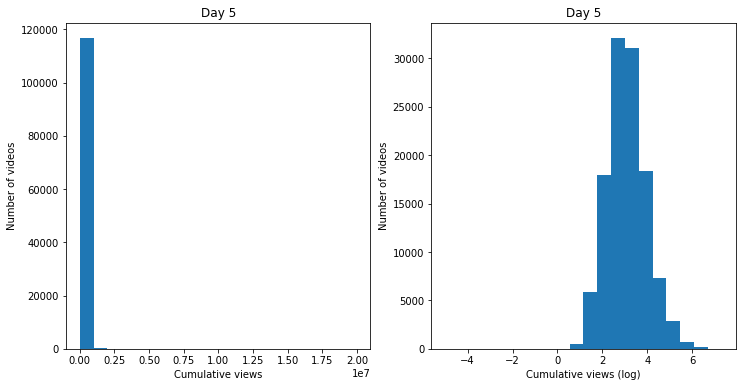

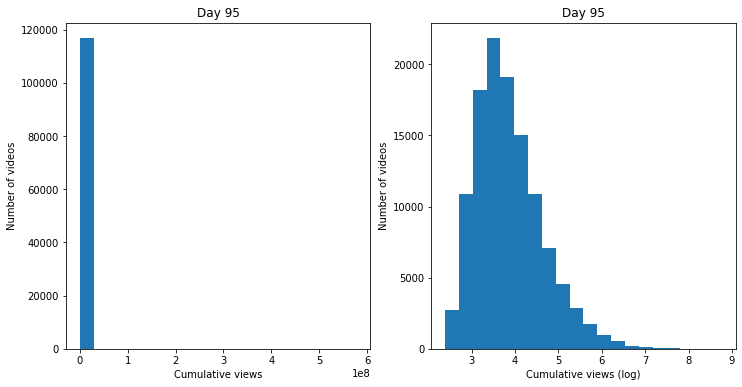

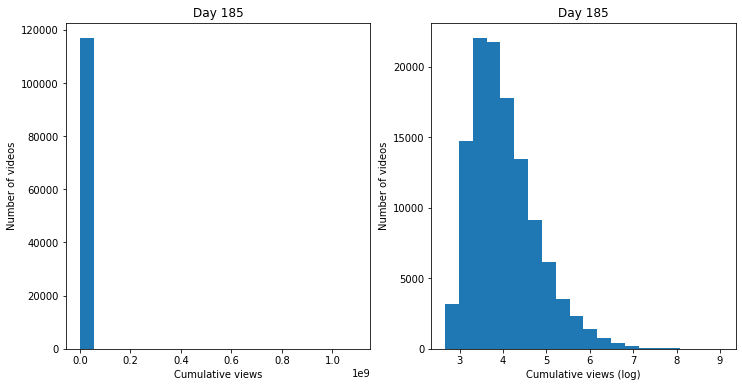

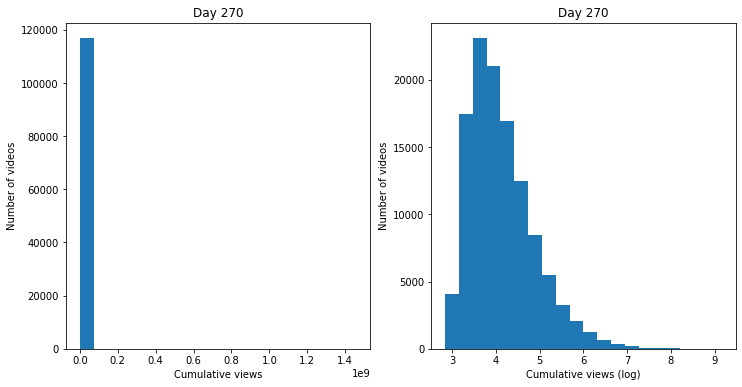

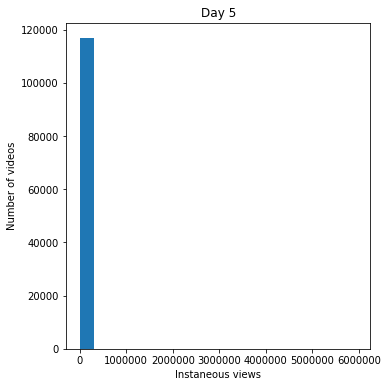

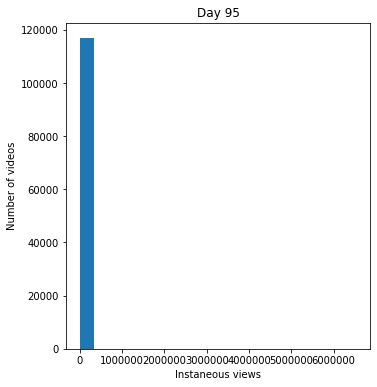

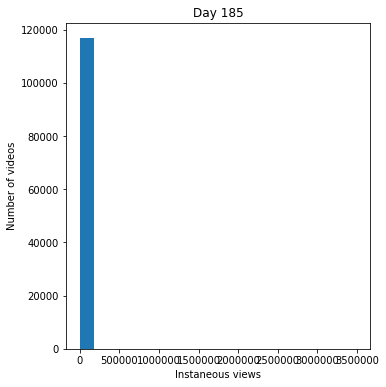

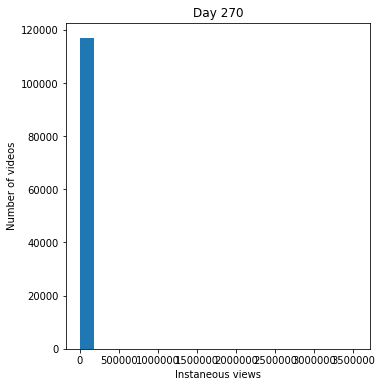

In [14]:
category = categories[1]
vids, days, views = engage_read_combine(engage_dataset_base, category)
eval_days = [5, 95, 185, 270]

# cumulative
df_total_views = my_util.total_at(eval_days, views, vids, accumulate=True)
for day in eval_days[:]:
    fig = plt.figure(figsize=(12, 6))

    series1 = df_total_views[day]
    ax = fig.add_subplot(1,2,1)
    n, bins, patches = ax.hist(series1, bins=20)
    ax.set_title(f"Day {day}")
    ax.set_xlabel("Cumulative views")
    ax.set_ylabel("Number of videos")

    series2 = np.log10(series1+10e-6)
    ax = fig.add_subplot(1,2,2)
    n, bins, patches = ax.hist(series2, bins=20)
    ax.set_title(f"Day {day}")
    ax.set_xlabel("Cumulative views (log)")
    ax.set_ylabel("Number of videos")

# instaneous
views_instaneous = []
for series in views:
    tmp = [series[day-1] for day in eval_days]
    views_instaneous.append(tmp)
df_instaneous_views = pd.DataFrame(views_instaneous, columns = eval_days, index = vids)    
for day in eval_days[:]:
    fig = plt.figure(figsize=(12, 6))

    series1 = df_instaneous_views[day]
    ax = fig.add_subplot(1,2,1)
    n, bins, patches = ax.hist(series1, bins=20)
    ax.set_title(f"Day {day}")
    ax.set_xlabel("Instaneous views")
    ax.set_ylabel("Number of videos")